In [7]:
import os, shutil

# 원본 데이터셋을 압축 해제한 디렉터리 경로
# original_dataset_dir = './dataset/cats_and_dogs/train'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = './Data/Side_Apple/'

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')

validation_dir = os.path.join(base_dir, 'validation')

test_dir = os.path.join(base_dir, 'test')

In [2]:
from tensorflow.keras.applications.vgg16 import VGG16

conv_base = VGG16(weights='imagenet',         # 초기화할 가중치 종류
      include_top = False,        # FNN중 사용하지 않고 내가 재구성 할 것임
      input_shape = (150,150,3))  

conv_base.trainable = False # 컨브넷 영결 , 훈련이 적용되지 않음

In [3]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

model = Sequential()

# 사전학습 모델 추가

model.add(conv_base)

#FNN층 구성

model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid')) #개 또는 고양이 븐류 목정, 이진 분류


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dropout (Dropout)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 18,910,017
Trainable params: 4,195,329
Non-trainable params: 14,714,688
_________________________________________________________________


In [8]:
train_dir

'./Data/Side_Apple/train'

In [9]:
from keras.preprocessing.image import ImageDataGenerator

# 훈련용 제너레이터
train_datagen = ImageDataGenerator(
    rescale=1./255,    #전처리
    rotation_range=40, # 랜덤하게 사진을 회전시킬 각도 범위(0~180)
    width_shift_range=0.2, #사진을 수평과 수직으로 랜덤하게 평행 이동시킬 범위
    height_shift_range=0.2,
    shear_range=0.2, #랜덤하게 전단 변환을 적용할 각도 범위
    zoom_range=0.2,   #랜덤하게 사진을 확대할 범위
    horizontal_flip=True, #랜덤하게 이미지를 수평으로 뒤집기
    fill_mode='nearest') #회전이나 가로/세로 이동으로 인해 새롭게 생성해야 할 픽셀을 채울 전략

# 검증용 데이터는 argumentataion 적용하지 않음
valid_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
train_generator = train_datagen.flow_from_directory(
    train_dir , #타깃 디렉토리
    target_size=(150,150), #모든 이미지의 크기를 150x150로 변경
    batch_size=20, #하드 드라이브에서 몇 장의 이미지를 메모리에 올릴건지(훈련용으로)
    class_mode='binary' # 이진분류의 목적이므로 자동으로 train_dir아래에 두가지의 폴더를 기준으로 라벨링처리
    )

Found 1221 images belonging to 2 classes.


In [12]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy']  
                )

In [22]:
epoch_hist = model.fit_generator(
                train_generator, #훈련용 제너레이터
                steps_per_epoch=50, #에포크당 100step으로
                epochs=10, #에포크 30회
                verbose = 1
)

C:\Users\82106\AppData\Local\Temp\ipykernel_26712\1960213512.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  epoch_hist = model.fit_generator(


Epoch 1/10
50/50 [==============================] - 65s 1s/step - loss: 0.0712 - accuracy: 0.9745
Epoch 2/10
50/50 [==============================] - 66s 1s/step - loss: 0.0674 - accuracy: 0.9745
Epoch 3/10
50/50 [==============================] - 65s 1s/step - loss: 0.0433 - accuracy: 0.9837
Epoch 4/10
50/50 [==============================] - 66s 1s/step - loss: 0.0673 - accuracy: 0.9694
Epoch 5/10
50/50 [==============================] - 67s 1s/step - loss: 0.0845 - accuracy: 0.9670
Epoch 6/10
50/50 [==============================] - 68s 1s/step - loss: 0.0720 - accuracy: 0.9735
Epoch 7/10
50/50 [==============================] - 66s 1s/step - loss: 0.0480 - accuracy: 0.9827
Epoch 8/10
50/50 [==============================] - 68s 1s/step - loss: 0.0413 - accuracy: 0.9827
Epoch 9/10
50/50 [==============================] - 66s 1s/step - loss: 0.0691 - accuracy: 0.9755
Epoch 10/10
50/50 [==============================] - 68s 1s/step - loss: 0.0399 - accuracy: 0.9860


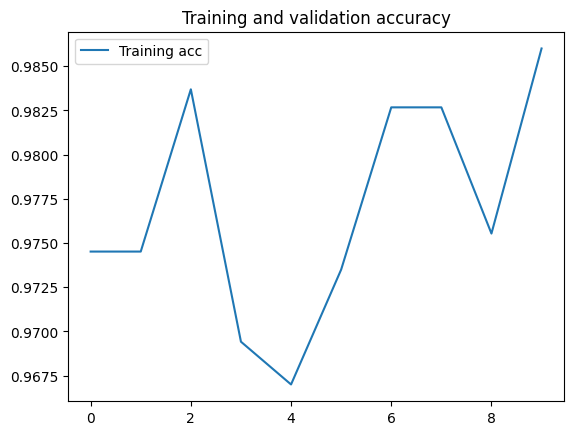

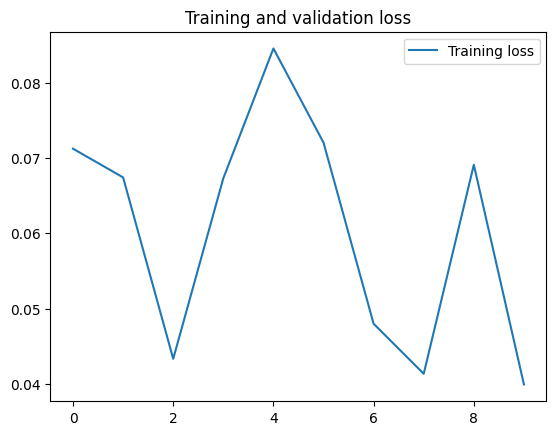

In [23]:
import matplotlib.pyplot as plt

acc = epoch_hist.history['accuracy']
loss = epoch_hist.history['loss']

plt.plot(acc, label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(loss, label='Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 종합코드


In [16]:
import os, shutil
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator

# 소규모 데이터셋을 저장할 디렉터리
base_dir = './Data/Apple_one/'

# 훈련, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')

test_dir = os.path.join(base_dir, 'test')

conv_base = VGG16(weights='imagenet',         # 초기화할 가중치 종류
      include_top = False,        # FNN중 사용하지 않고 내가 재구성 할 것임
      input_shape = (150,150,3))  

conv_base.trainable = False # 컨브넷 영결 , 훈련이 적용되지 않음


train_datagen = ImageDataGenerator(
    rescale=1./255,    #전처리
    rotation_range=40, # 랜덤하게 사진을 회전시킬 각도 범위(0~180)
    width_shift_range=0.2, #사진을 수평과 수직으로 랜덤하게 평행 이동시킬 범위
    height_shift_range=0.2,
    shear_range=0.2, #랜덤하게 전단 변환을 적용할 각도 범위
    zoom_range=0.2,   #랜덤하게 사진을 확대할 범위
    horizontal_flip=True, #랜덤하게 이미지를 수평으로 뒤집기
    fill_mode='nearest') #회전이나 가로/세로 이동으로 인해 새롭게 생성해야 할 픽셀을 채울 전략


train_generator = train_datagen.flow_from_directory(
    train_dir , #타깃 디렉토리
    target_size=(150,150), #모든 이미지의 크기를 150x150로 변경
    batch_size=20, #하드 드라이브에서 몇 장의 이미지를 메모리에 올릴건지(훈련용으로)
    class_mode='binary' # 이진분류의 목적이므로 자동으로 train_dir아래에 두가지의 폴더를 기준으로 라벨링처리
    )

model = Sequential()

# 사전학습 모델 추가

model.add(conv_base)

#FNN층 구성

model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid')) #이진 분류

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']  
                )

epoch_hist = model.fit_generator(
                train_generator, #훈련용 제너레이터
                steps_per_epoch=50, #에포크당 100step으로
                epochs=10, #에포크 30회
                verbose = 1
)

acc = epoch_hist.history['accuracy']
loss = epoch_hist.history['loss']

plt.plot(acc, label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(loss, label='Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.save('./model/VGG16_side.h5')

Found 36658 images belonging to 3 classes.
Epoch 1/10


C:\Users\82106\AppData\Local\Temp\ipykernel_8372\3505382838.py:59: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  epoch_hist = model.fit_generator(


22/50 [============>.................] - ETA: 40s - loss: 0.0000e+00 - accuracy: 0.3295

KeyboardInterrupt: 

In [13]:
# 소규모 데이터셋을 저장할 디렉터리
base_dir = './Data/Apple_one/'

# 훈련, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'Train')


test_dir = os.path.join(base_dir, 'test')


train_Good_dir = os.path.join(train_dir, 'GoodApple')

train_Bad_dir = os.path.join(train_dir, 'BadApple')

train_Uggly_dir = os.path.join(train_dir, 'UgglyApple')

## 평가하기

In [2]:
from tensorflow.keras.models import load_model

model = load_model('./model/Side_Apple.h5')

In [19]:
from tensorflow.keras.preprocessing import image
import numpy as np

path = './Data/Side_Apple/Test/못난이.jpg'

img = image.load_img(path, target_size=(150,150))
x = image.img_to_array(img)

x = np.expand_dims(x, axis=0)/255.0

In [20]:
x.min(), x.max()

(0.0, 1.0)

In [7]:
x.shape

(1, 150, 150, 3)

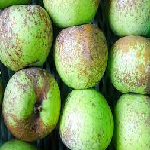

In [21]:
img

In [22]:
result = model.predict(x)
result

1/1 [==============================] - 0s 229ms/step


array([[0.17580256]], dtype=float32)

In [23]:
if np.round(result[0][0]*100,2) > 50:
    print('정상사과입니다')
else :
    print('상태가 안좋은 사과입니다')

상태가 안좋은 사과입니다


In [24]:
def Apple(path):
    img = image.load_img(path,target_size=(150,150)) #텐서플로 전용 이미지 로드 함수를 사용
    plt.imshow(img)
    plt.show()

    #전처리
    x = image.img_to_array(img)  # 이미지를 배열로 변환
    x = np.expand_dims(x, axis=0)/255.0    

    #예측
    result = model.predict(x)
    print(result)

    if np.round(result[0][0]*100,2) > 50:
        print('정상사과입니다')
    else :
        print('상태가 안좋은 사과입니다')


In [41]:
import os
 
root_dir = './Data/Side_Apple/Test' # 디렉토리
 
img_path_list = []
possible_img_extension = ['.jpg', '.jpeg', '.JPG', '.bmp', '.png'] # 이미지 확장자들
 
for (root, dirs, files) in os.walk(root_dir):
    if len(files) > 0:
        for file_name in files:
            if os.path.splitext(file_name)[1] in possible_img_extension:
                img_path = root + '/' + file_name
                
                # 경로에서 \를 모두 /로 바꿔줘야함
                img_path = img_path.replace('\\', '/') # \는 \\로 나타내야함         
                img_path_list.append(img_path)
                             
print(img_path_list)

['./Data/Side_Apple/Test/images (1).jpg', './Data/Side_Apple/Test/images (2).jpg', './Data/Side_Apple/Test/images.jpg', './Data/Side_Apple/Test/다운로드 (1).jpg', './Data/Side_Apple/Test/다운로드.jpg', './Data/Side_Apple/Test/못난이.jpg', './Data/Side_Apple/Test/BadApple/다운로드 (1).jpg', './Data/Side_Apple/Test/BadApple/다운로드.jpg', './Data/Side_Apple/Test/GoodApple/images (1).jpg', './Data/Side_Apple/Test/GoodApple/images (2).jpg', './Data/Side_Apple/Test/GoodApple/images.jpg']


In [42]:
len(img_path_list)

11

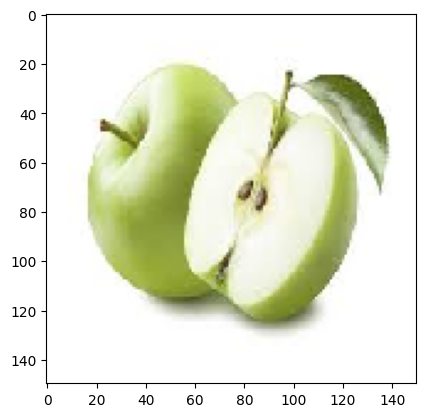

1/1 [==============================] - 0s 106ms/step
[[0.54552275]]
정상사과입니다


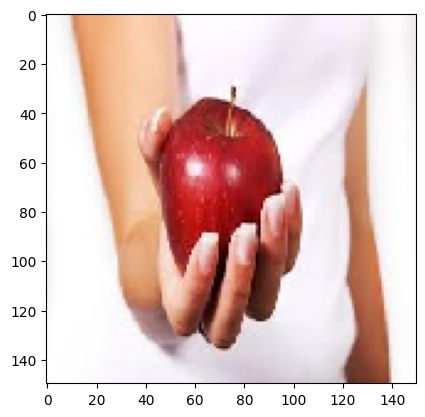

1/1 [==============================] - 0s 115ms/step
[[0.00311373]]
상태가 안좋은 사과입니다


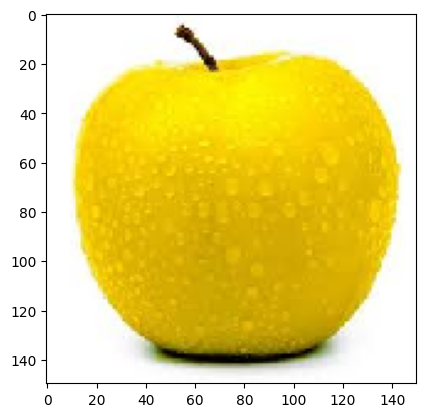

1/1 [==============================] - 0s 103ms/step
[[0.9986903]]
정상사과입니다


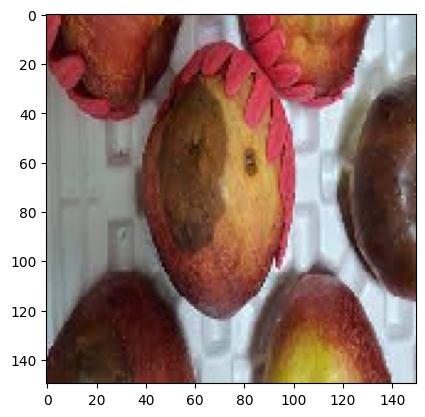

1/1 [==============================] - 0s 97ms/step
[[0.10450191]]
상태가 안좋은 사과입니다


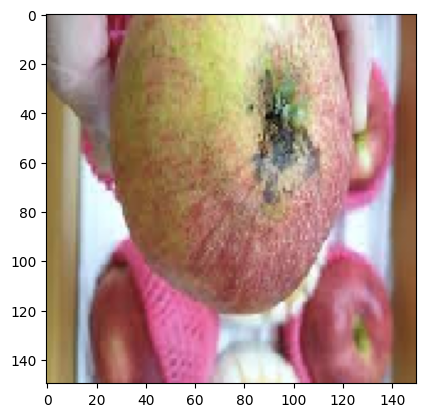

1/1 [==============================] - 0s 123ms/step
[[0.02346008]]
상태가 안좋은 사과입니다


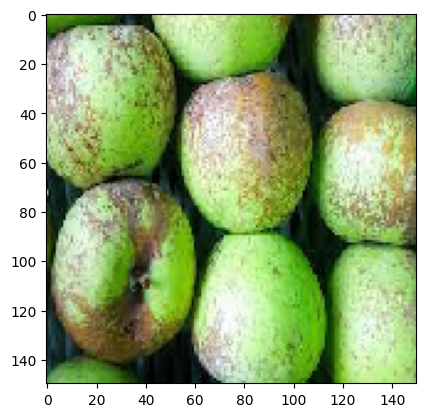

1/1 [==============================] - 0s 189ms/step
[[0.17580256]]
상태가 안좋은 사과입니다


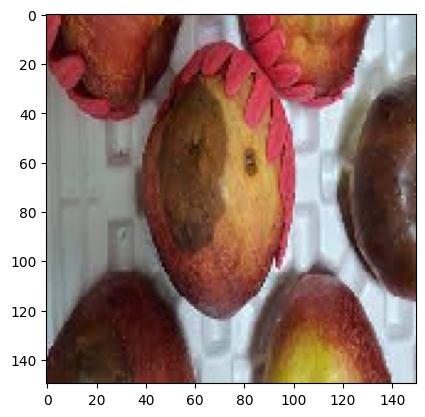

1/1 [==============================] - 0s 167ms/step
[[0.10450191]]
상태가 안좋은 사과입니다


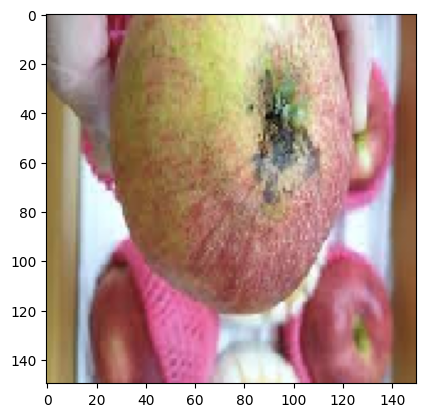

1/1 [==============================] - 0s 112ms/step
[[0.02346008]]
상태가 안좋은 사과입니다


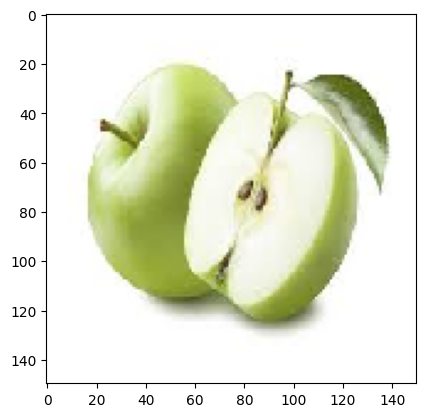

1/1 [==============================] - 0s 111ms/step
[[0.54552275]]
정상사과입니다


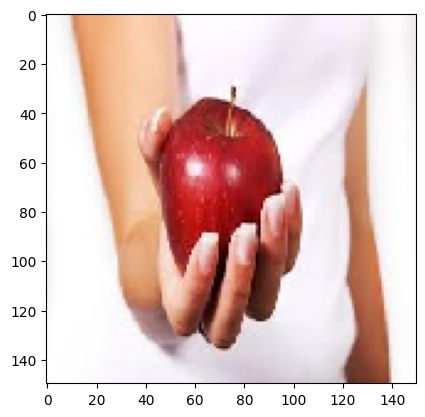

1/1 [==============================] - 0s 113ms/step
[[0.00311373]]
상태가 안좋은 사과입니다


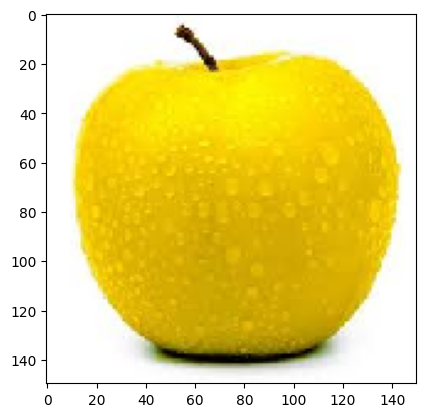

1/1 [==============================] - 0s 126ms/step
[[0.9986903]]
정상사과입니다


In [43]:
for i in range(len(img_path_list)):
    path = img_path_list[i]
    Apple(path)